In [3]:
import glob
import h5py
import pandas as pd

from src import io, ttl, vis
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

In [6]:
# set main data path
# base_data_path = '/home/ptarabishi/repos/maui_codebook/data/'
base_data_path = "/Volumes/AhmedLab/princess/data"
exp = 1901

# set experiment file path
# processed_path = glob.glob(os.path.join(base_data_path, f'*{exp}'))[0]
processed_path = glob.glob(os.path.join(base_data_path, 'processed', f'*{exp}'))[0]
print(processed_path)


# load in data
cluster_labels, signal = io.load_clusters(processed_path)
scope_fr, camera_fr, brain_dim = io.load_acquisition_params(processed_path)
# smoothed_speed, xy_pos, delta_rot = io.load_fictrac_data(processed_path)

volume_rate, maui_time = ttl.convert_maui_times(scope_fr, signal)


/Volumes/AhmedLab/princess/data/processed/251024_1901
volume rate: 2.73 Hz, total experiment length 489.40 seconds


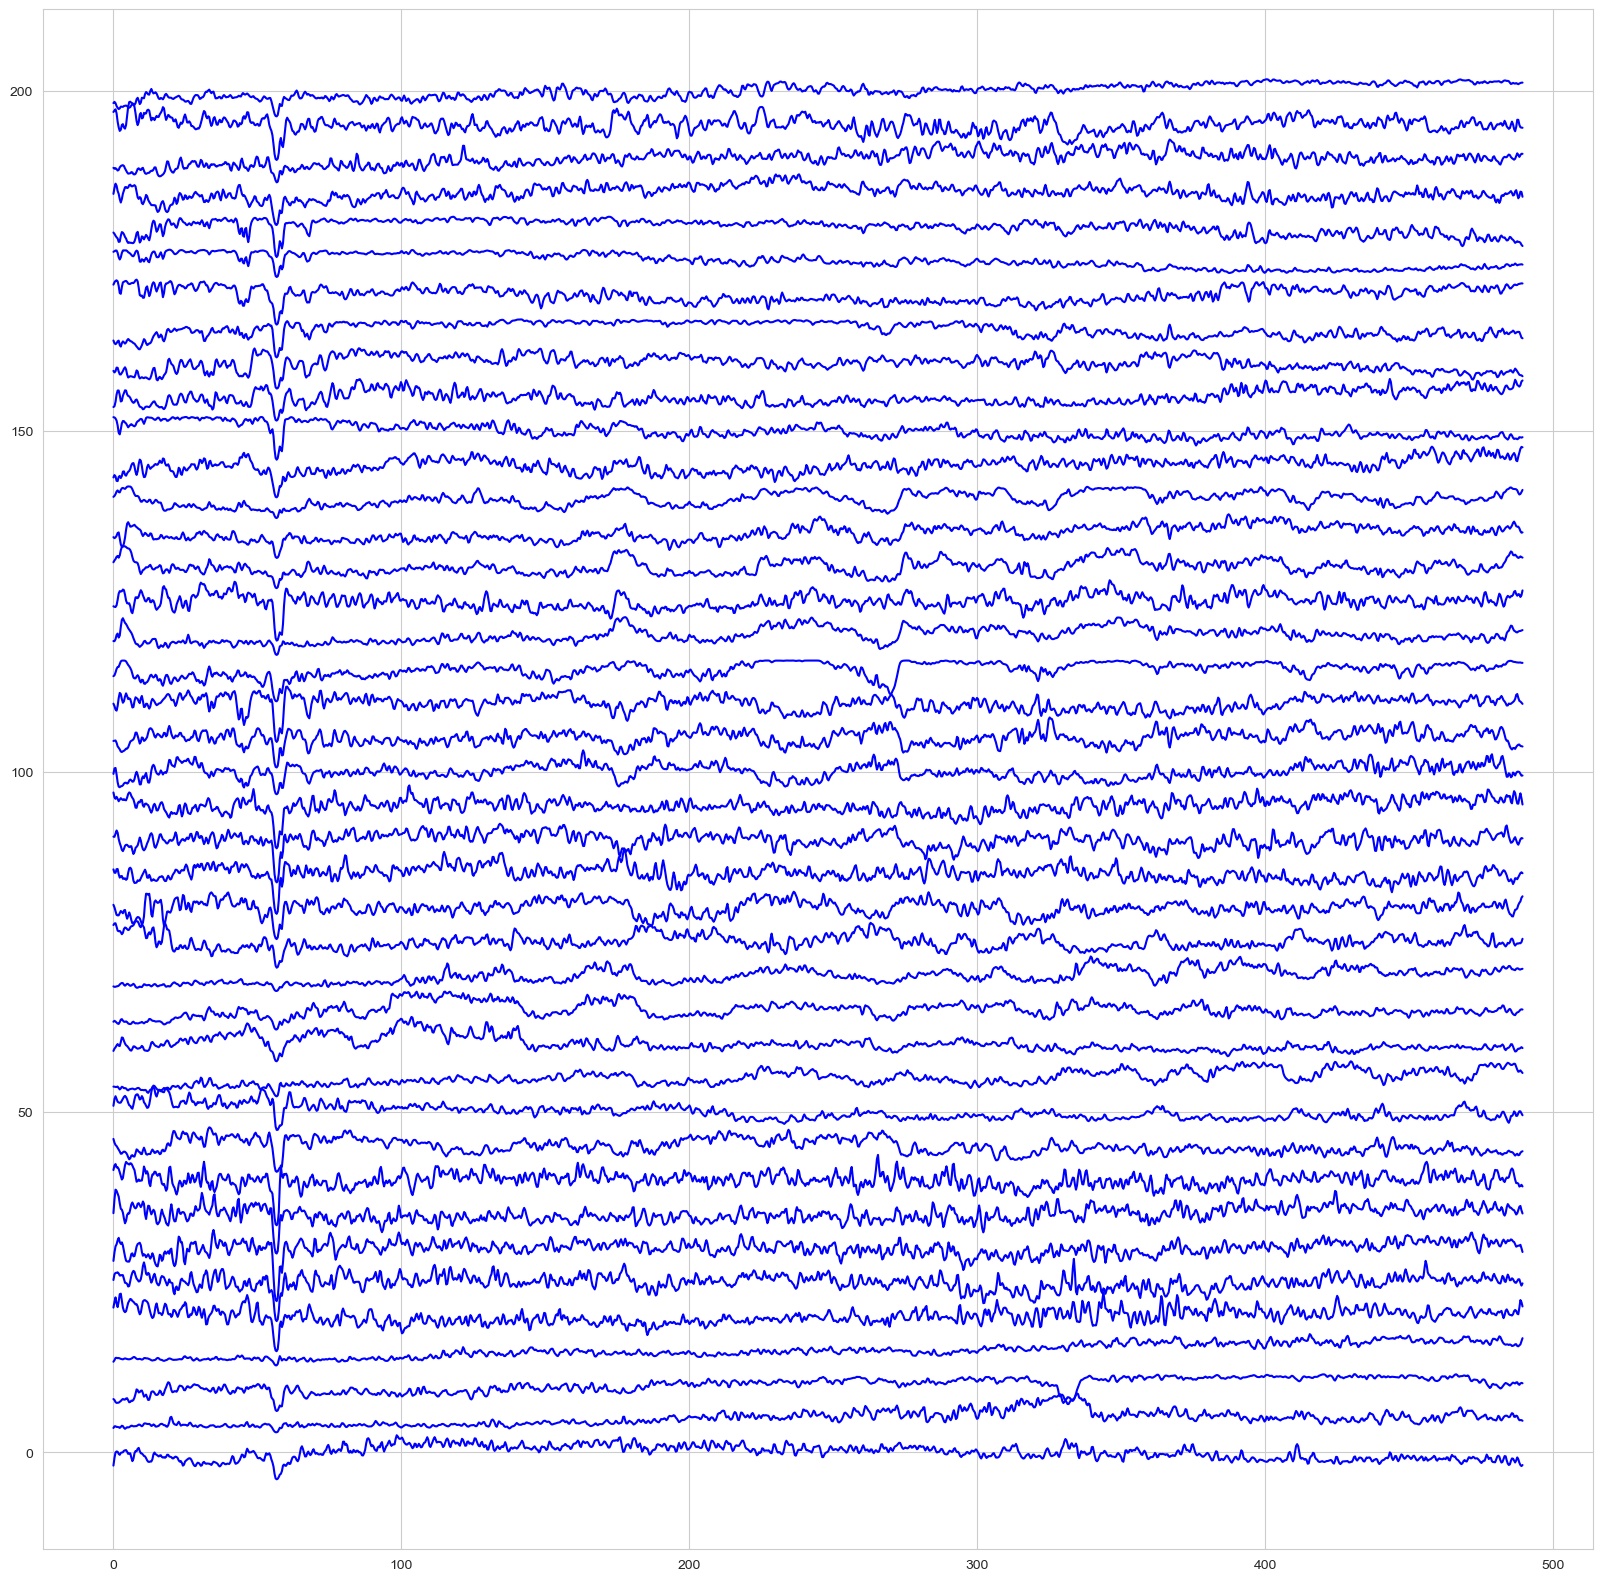

In [8]:
test = vis.plot_raw_calcium_traces(maui_time, signal[13], sv_toplot=40)
# test.savefig(fr'{processed_path}/Ca traces.png')

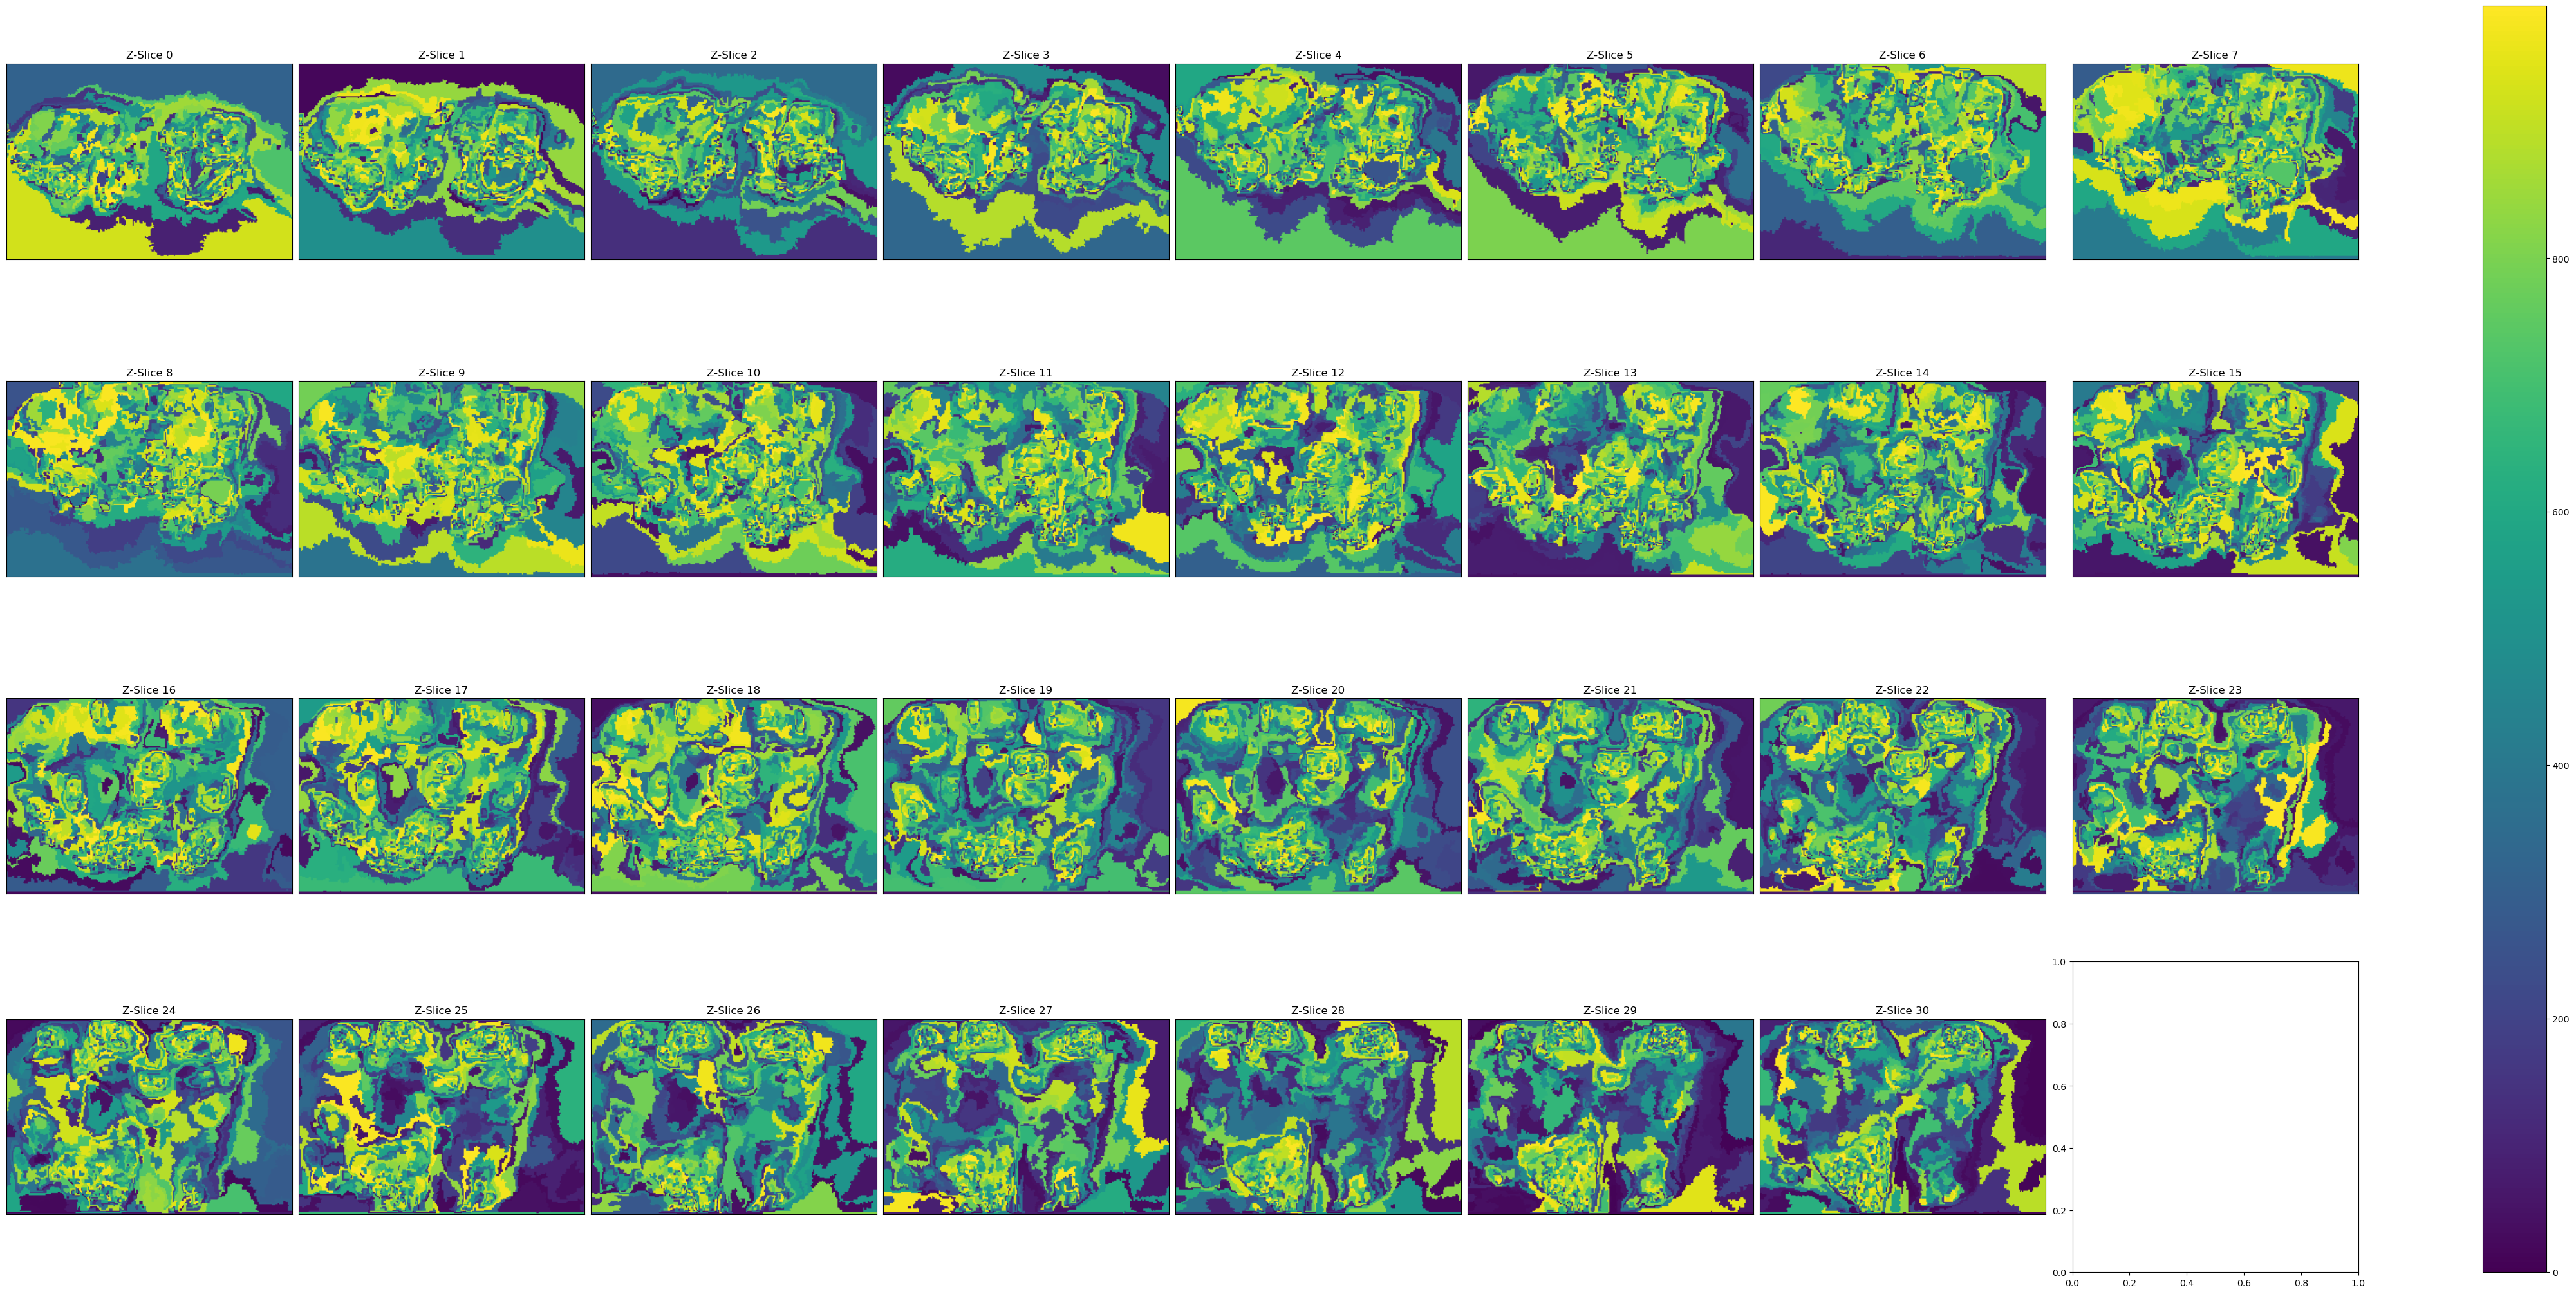

In [65]:
# make spatial plots
# from original cluster labels h5

spatial_grid = np.reshape(cluster_labels, (cluster_labels.shape[0],brain_dim[0],brain_dim[1]))
# shape = rois, x, y

def plot_spatial_clusters(spatial_array, normalize_colors=False):
    fig = plt.figure(figsize=(40,20), constrained_layout = True)
    gspec = fig.add_gridspec(4,8)
    nrows, ncols = gspec.get_geometry()
    axs =  np.array([[fig.add_subplot(gspec[i, j]) for j in range(ncols)] for i in range(nrows)])
    norm = None

    if normalize_colors == True:
        color_range = Normalize(vmin=np.min(spatial_array), vmax=np.max(spatial_array))
        # fig.subplots_adjust(right=0.8)
        # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        
        norm=color_range

    counter = 0
    images = []
    for i in range(nrows):
        for j in range(ncols):
            images.append(axs[i,j].imshow(spatial_grid[counter].T, norm=norm))
            axs[i,j].set_title(f'Z-Slice {counter}')
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            counter += 1
            if counter == spatial_grid.shape[0]:
                break
    fig.colorbar(images[0], ax=axs)



plot_spatial_clusters(spatial_grid, normalize_colors=True)
